<a href="https://colab.research.google.com/github/remizah/Luminar_projects/blob/main/Luminar_data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/data.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
X=df.iloc[:,1:-1]
X

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [ ]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)


LinearRegression()

In [ ]:
y_pred=lr.predict(X)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

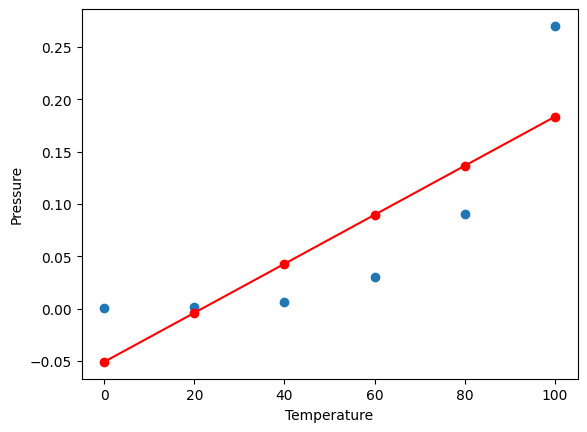

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.scatter(X,y)
plt.scatter(X,y_pred,color="red")
plt.plot(X,y_pred,color="red")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
print("r2_score:",r2_score(y,y_pred))
print("MAE:",mean_absolute_error(y,y_pred))
print("MSE:",mean_squared_error(y,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y,y_pred)))

r2_score: 0.690349972603981
MAE: 0.047653333333333346
MSE: 0.002870267555555557
RMSE: 0.053574878026511244


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
poly.fit(X)
x_poly=poly.transform(X)
x_poly

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.0000e+01, 4.0000e+02, 8.0000e+03, 1.6000e+05,
        3.2000e+06],
       [1.0000e+00, 4.0000e+01, 1.6000e+03, 6.4000e+04, 2.5600e+06,
        1.0240e+08],
       [1.0000e+00, 6.0000e+01, 3.6000e+03, 2.1600e+05, 1.2960e+07,
        7.7760e+08],
       [1.0000e+00, 8.0000e+01, 6.4000e+03, 5.1200e+05, 4.0960e+07,
        3.2768e+09],
       [1.0000e+00, 1.0000e+02, 1.0000e+04, 1.0000e+06, 1.0000e+08,
        1.0000e+10]])

In [ ]:
lr_poly=LinearRegression()
lr_poly.fit(x_poly,y)

LinearRegression()

In [ ]:
y_poly=lr_poly.predict(x_poly)
y_poly

array([2.00000314e-04, 1.20000006e-03, 5.99999994e-03, 2.99999999e-02,
       8.99999998e-02, 2.70000000e-01])

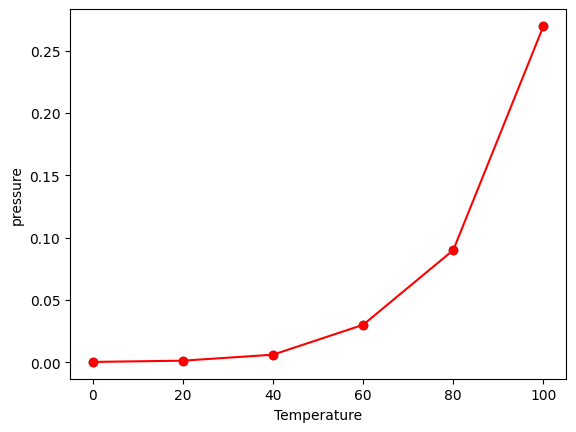

In [ ]:
plt.xlabel("Temperature")
plt.ylabel("pressure")
plt.scatter(X,y)
plt.scatter(X,y_poly,color="red")
plt.plot(X,y_poly,color="red")
plt.show()

In [ ]:
print("r2_score:",r2_score(y,y_poly))


r2_score: 1.0


In [ ]:
result=pd.DataFrame({'actual':y,'simple':y_pred,'polynomial':y_poly})
result

,actual,simple,polynomial
0,0.0002,-0.050867,0.0002
1,0.0012,-0.004027,0.0012
2,0.0060,0.042813,0.0060
3,0.0300,0.089653,0.0300
4,0.0900,0.136493,0.0900
5,0.2700,0.183333,0.2700
